<a href="https://colab.research.google.com/github/dinuka-rp/L6-AI/blob/main/Prasan_Yapa/LSTM-Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Analysis with LSTM using Python’s Keras library

LSTM (Long Short-Term Memory network) is a type of Recurrent Neural Network (RNN) capable of remembering the past information and while predicting the future values, it takes this past information into account.

## Importing data set

In [16]:
import pandas as pd

In [17]:
apple_training_complete = pd.read_csv('/content/drive/MyDrive/Datasets/apple_training.csv')

apple_training_complete.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,120.553181,121.599357,119.478726,120.552883,113.957782,5.281330e+07
std,41.692663,42.043099,41.319459,41.691989,42.787262,3.572438e+07
min,55.424286,57.085712,55.014286,55.790001,49.259438,1.147590e+07
25%,92.902503,93.592501,91.925002,92.737501,85.321665,2.837228e+07
50%,112.974998,114.174999,111.800003,112.990002,105.890720,4.228650e+07
75%,151.442501,153.337497,149.690007,150.947502,146.289738,6.605078e+07
max,230.779999,233.470001,229.779999,232.070007,227.839798,3.652131e+08


We are only interested in the opening price of the stock. Therefore, we will filter all the data
from our training set and will retain only the values for the Open column.

In [19]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

# https://www.askpython.com/python/built-in-methods/python-iloc-function

## Data normalization

As a rule of thumb, whenever you use a neural network, you should normalize or scale your
data. 

We will use *MinMaxScaler* class from the sklear.preprocessing library to scale our data
between 0 and 1.

The `feature_range` parameter is used to specify the range of the scaled data. 

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0, 1))
apple_training_scaled = scale.fit_transform(apple_training_processed)

## Converting training data to right shape

Our feature set should contain the opening stock price values for the past 60 days while the
label or dependent variable should be the stock price at the 61st day.

In [21]:
features_set = []
labels = []

for i in range(60, 1260):
  features_set.append(apple_training_scaled[i - 60:i, 0])
  labels.append(apple_training_scaled[i, 0])

In the script above we create two lists: `feature_set` and `labels`. There are 1260 records in the
training data. We execute a loop that starts from 61st record and stores all the previous 60
records to the feature_set list. The 61st record is stored in the labels list.

We need to convert both the `feature_set` and the `labels` list to the numpy array before we can
use it for training. 

In [22]:
import numpy as np

features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on our data, we need to convert our data into the shape accepted by
the LSTM. We need to convert our data into three-dimensional format.

The first dimension is
the number of records or rows in the dataset which is 1260 in our case.

The second dimension
is the number of time steps which is 60 while 

the last dimension is the number of indicators.

Since we are only using one feature, i.e. Open, the number of indicators will be one.

In [23]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

## Training the LSTM

The LSTM model that we are going to create will be a sequential model with multiple layers.
We will add four LSTM layers to our model followed by a dense layer that predicts the future
stock price.

As a first step, we need to instantiate the Sequential class. This will be our model class and we
will add LSTM, Dropout and Dense layers to this model.

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

Let's add LSTM layer to the model that we just created.

In [25]:
model.add(LSTM(units=50, return_sequences=True,
input_shape=(features_set.shape[1], 1)))

Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting,
which is a phenomenon where a machine learning model performs better on the training data
compared to the test data.

In [26]:
model.add(Dropout(0.2))

Let's add three more LSTM and dropout layers to our model.

In [27]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

To make our model more robust, we add a dense layer at the end of the model. The number
of neurons in the dense layer will be set to 1 since we want to predict a single value in the
output.

In [28]:
model.add(Dense(units=1))

Finally, we need to compile our LSTM before we can train it on the training data.

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

We call the compile method on the Sequential model object which is "model" in our case. We
use the mean squared error as loss function and to reduce the loss or to optimize the
algorithm, we use the adam optimizer.

we call the fit method on the model and pass it our training features and labels as shown below

In [30]:
model.fit(features_set, labels, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 123ms/step - loss: 0.0214
Epoch 2/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0026
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0019
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0018
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0018
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0018
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0017
Epoch 11/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0015
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0017
Epoch 13/100

## Testing the LSTM

We have successfully trained our LSTM, now is the time to test the performance of our
algorithm on the test set by predicting the opening stock prices for the month of January
2019.

However, as we did with the training data, we need to convert our test data in the right format. Let's first import our test data.

In [18]:
apple_testing_complete = pd.read_csv('/content/drive/MyDrive/Datasets/apple_testing.csv')

apple_testing_complete.describe()

,Open,High,Low,Close,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,153.247618,155.071430,151.562857,153.751904,151.475977,3.915959e+07
std,4.455294,4.439687,4.216462,4.632128,4.563560,1.599264e+07
min,143.979996,145.720001,142.000000,142.190002,140.085220,2.313060e+07
25%,150.850006,153.389999,149.630005,152.289993,150.035706,2.982120e+07
50%,154.110001,155.139999,151.740005,153.800003,151.523376,3.375100e+07
75%,155.789993,157.880005,154.110001,156.300003,153.986359,4.158720e+07
max,163.250000,166.149994,160.229996,165.250000,162.803864,9.131220e+07


In [31]:
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

For each day of January 2019, we want our feature set to contain the opening stock prices for
the previous 60 days. For the 1st of January, we need the stock prices for the previous 60
days. To do so, we need to concatenate our training data and test data before preprocessing. 

In [32]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

Now let's prepare our test inputs. The input for each day should contain the opening stock
prices for the previous 60 days

In [33]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [44]:
# print(test_inputs[:10])

[[0.99583706]
 [1.        ]
 [0.98391845]
 [0.95112796]
 [0.95928276]
 [0.96966171]
 [0.90727422]
 [0.94092008]
 [0.94514011]
 [0.93242304]]


As we did for the training set, we need to scale our test data.

In [34]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scale.transform(test_inputs)

Now let's prepare our final test input set that will contain previous 60 stock prices for the month of January.

In [35]:
test_features = []

for i in range(60, 80):
  test_features.append(test_inputs[i - 60:i, 0])

Finally, we need to convert our data into the three-dimensional format which can be used as
input to the LSTM.

In [36]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

We preprocessed our test data and now we can use it to make predictions. To do so, we
simply need to call the `predict` method on the model that we trained.

In [37]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to
reverse the scaled prediction back to their actual values. To do so, we can use the `ìnverse_transform` method of the scaler object we created during training.

In [38]:
predictions = scale.inverse_transform(predictions)

Finally, let's see how well our algorithm predicted the future stock prices

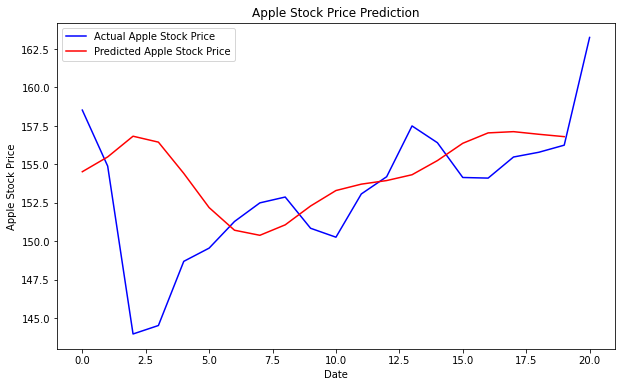

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()